# FOUNDATIONS OF DATA SCIENCE 


> SUBMITTED BY SHUBHAM TEJANI , 20BAI10152



## Programs for represent relations between data, and necessary linear algebraic operations on matrices.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np

# Suppose we have the following data:
# - Three people: Alice, Bob, and Charlie
# - Each person has three attributes: height (in cm), weight (in kg), and age (in years)
# - We represent this data using a matrix X of shape (3, 3), where each row represents a person and each column represents an attribute
X = np.array([
    [170, 60, 25],
    [180, 80, 30],
    [165, 55, 20]
])

# We can represent a relation between this data using a matrix A of shape (3, 3), where A[i,j] represents the strength of the relationship between attribute i and attribute j
# For example, if A[0,1] is large and positive, it means that there is a strong positive correlation between height and weight
A = np.array([
    [1.0, 0.8, 0.3],
    [0.8, 1.0, 0.2],
    [0.3, 0.2, 1.0]
])

# We can perform various linear algebraic operations on these matrices. For example:

# Compute the transpose of X
X_T = np.transpose(X)
print("X transpose:\n", X_T)

# Compute the product of A and X
AX = np.matmul(A, X)
print("AX:\n", AX)

# Compute the inverse of A
A_inv = np.linalg.inv(A)
print("A inverse:\n", A_inv)

# Compute the determinant of A
A_det = np.linalg.det(A)
print("A determinant:", A_det)

# Compute the eigenvalues and eigenvectors of A
A_eigvals, A_eigvecs = np.linalg.eig(A)
print("A eigenvalues:\n", A_eigvals)
print("A eigenvectors:\n", A_eigvecs)


X transpose:
 [[170 180 165]
 [ 60  80  55]
 [ 25  30  20]]
AX:
 [[363.5 140.5  55. ]
 [349.  139.   54. ]
 [252.   89.   33.5]]
A inverse:
 [[ 2.94478528 -2.26993865 -0.42944785]
 [-2.26993865  2.79141104  0.12269939]
 [-0.42944785  0.12269939  1.10429448]]
A determinant: 0.3259999999999999
A eigenvalues:
 [1.93421622 0.19314192 0.87264187]
A eigenvectors:
 [[-0.67123725 -0.71866142 -0.18156626]
 [-0.65077436  0.68862977 -0.31981522]
 [-0.35487079  0.09651322  0.92992038]]


## Programs to representing matrices by decompositions (SVD and PCA).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


In [ ]:
# Load the wine dataset
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
wine.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
# Separate the data and the labels
X = wine.iloc[:, 1:].values
y = wine.iloc[:, 0].values

# Standardize the data
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Perform SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_std)

# Print the explained variance ratios
print('PCA explained variance ratio:', sum(pca.explained_variance_ratio_))
print('SVD explained variance ratio:', sum(svd.explained_variance_ratio_))

PCA explained variance ratio: 0.554063383569353
SVD explained variance ratio: 0.5540633835693527


##Program for Linear Regression- Logistic Regression – Classifiers – k-Nearest Neighbors (k-NN), k-means -Decision tree – Naive Bayes- Ensemble Methods – Random Forest.

Mean Squared Error: 0.9000820622604


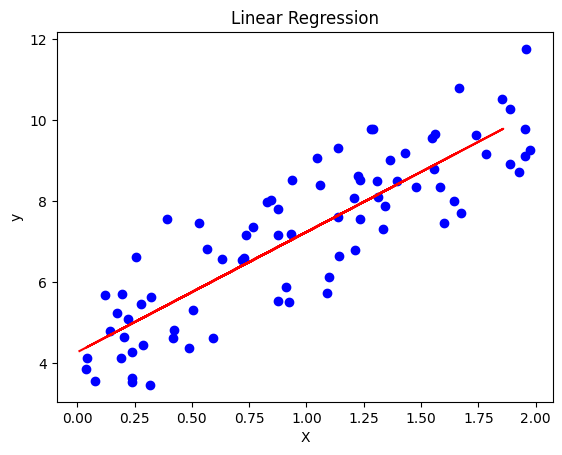

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split data into training and testing sets
X_train, y_train = X[:80], y[:80]
X_test, y_test = X[80:], y[80:]

# Define linear regression model
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((len(X), 1)), X]
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)

# Train the model on the training data
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lin_reg.predict(X_test)

# Compute mean squared error (MSE) on the testing data
mse = np.mean((y_test - y_pred)**2)
print("Mean Squared Error:", mse)

# Plot the training data and the learned linear regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix


# Load the Adult Income dataset
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, na_values=[" ?"])
data.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]
data = data.dropna()

# Preprocess the data
categorical_cols = ["workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country", "income"]
for col in categorical_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

numeric_cols = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week"]
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Split the data into training and testing sets
X = data.drop("income", axis=1)
y = data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# k-Nearest Neighbors (k-NN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("k-NN Accuracy:", knn_accuracy)
print("k-NN Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# k-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
kmeans_accuracy = accuracy_score(y_test, y_pred)
print("k-Means Accuracy:", kmeans_accuracy)


# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.8226421349245815
Logistic Regression Confusion Matrix:
 [[4262  241]
 [ 829  701]]
k-NN Accuracy: 0.8224763799104923
k-NN Confusion Matrix:
 [[4072  431]
 [ 640  890]]
k-Means Accuracy: 0.29355212995193103
Decision Tree Accuracy: 0.8093817337974474
Decision Tree Confusion Matrix:
 [[3930  573]
 [ 577  953]]
Naive Bayes Accuracy: 0.7984419028675618
Naive Bayes Confusion Matrix:
 [[4286  217]
 [ 999  531]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv(r'https://raw.githubusercontent.com/shubham404-error/Diabetes_Prediction/main/diabetes.csv')

# Split the data into training and testing sets
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
bagging_pred = bagging_clf.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)
print(f'Bagging Classifier Accuracy: {bagging_acc:.4f}')

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f'Random Forest Classifier Accuracy: {rf_acc:.4f}')


Bagging Classifier Accuracy: 0.7013
Random Forest Classifier Accuracy: 0.7208
